# Data Science & Statistics for Finance & Investment Exercises

## Bernoulli Distribution in a Finance Institution

Assume that you work on the equities trading desk at an institutional money manager that regularly trades with several block brokers. Blocks are orders to sell or buy that are too large for the liquidity ordinarily available on the dealer networks or the stock exchanges. 

Block brokers call your trading desk when they want to sell blocks of stocks that they think your firm may be interested in buying. You know that these transactions entail risks. There could be an immediate loss if the broker does not fully disclose all information, including unfavorable information the broker's client may have. Your firm calculates the post-trade risk-adjusted returns on the stock purchase from the block brokers.

In [1]:
# Probability of exactly J success given a C chance with a population N
import math

N = 12
J = 3
C = 0.5

x = math.factorial(N)/  (math.factorial(N-J) * math.factorial(J))

p = x * (C**J) * ((1-C)**(N-J))

print("The probability is",100*p,"%")

The probability is 5.37109375 %


## Real-Life Case Study: Common Probability Distributions

You are examining the record of an investment newsletter writer who claims a 70
percent success rate in making investment recommendations that are profitable over
a one-year time horizon. You have the one-year record of the newsletter’s seven
most recent recommendations. Four of those recommendations were profitable. If all
the recommendations are independent and the newsletter writer’s skill is as claimed,
what is the probability of observing four or fewer profitable recommendations out of
seven in total?

In [2]:
# Probability of >= J success given a C chance with a population N
import math

N4 = 7
J4 = 4
C4 = 0.7
p4 = (math.factorial(N4)/  (math.factorial(N4-J4) * math.factorial(J4))) * (C4**J4) * ((1-C4)**(N4-J4))

N3 = 7
J3 = 3
C3 = 0.7
p3 = (math.factorial(N3)/  (math.factorial(N3-J3) * math.factorial(J3))) * (C3**J3) * ((1-C3)**(N3-J3))

N2 = 7
J2 = 2
C2 = 0.7
p2 = (math.factorial(N2)/  (math.factorial(N2-J2) * math.factorial(J2))) * (C2**J2) * ((1-C2)**(N2-J2))

N1 = 7
J1 = 1
C1 = 0.7
p1 = (math.factorial(N1)/  (math.factorial(N1-J1) * math.factorial(J1))) * (C1**J1) * ((1-C1)**(N1-J1))

N0 = 7
J0 = 0
C0 = 0.7
p0 = (math.factorial(N0)/  (math.factorial(N0-J0) * math.factorial(J0))) * (C0**J0) * ((1-C0)**(N0-J0))

print(p4)
print(p3)
print(p2)
print(p1)
print(p0)
r = p4+p3+p2+p1+p0
print ("THE PROBABILITY IS",r)

0.22689450000000005
0.09724050000000004
0.025004700000000015
0.003572100000000003
0.00021870000000000022
THE PROBABILITY IS 0.3529305000000001


## Linear Regression for Income prediction

In this assignment we will be using an input file that contains Annual Income, Education Years and Age data for a cross section of people. The input file is in an excel format. Assuming that Education Years and Age (the independent variables) adequately define Annual Income (the dependent variable), please write a multiple linear regression and estimate the coefficients and the intercept term for this equation using LinearRegression from sklearn.linear_model:

Annual_Income = constant + coeffficient_1 * Education_Years + coefficient_2 * Age

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# read Excel into a dataframe
dincome = pd.read_excel('Income_Data.xlsx', sheet_name='Data')

# Assign independent variables, Education_Years and Age columns to variable X
X=dincome[['Education_Years', 'Age']]
# Assign dependent variable, Annual_Income to Y
Y=dincome[['Annual_Income']]

# Call a regressor
Regressor = LinearRegression()

# Fit the model
Regressor.fit(X,Y)   
# Print Coefficients
# Print Intercept
print("Coefficients: "+ str(Regressor.coef_))
print("Intercept: "+ str(Regressor.intercept_))

Coefficients: [[2704.61296819 1106.56959996]]
Intercept: [9915.31744185]


## Logistic Regression for Credit Profile prediction
We learnt how Python could be used for finding a solution to logistic regression problems. In this assignment we will be using the exact same input file we used in the lesson. To recap, this input file contains, Credit_Profile, Annual Income, Education Years and Age data for a cross section of people. The input file is in an excel format. Assuming that Annual Income, Education Years and Age (the independent variables) adequately define if a Credit Profile (the independent variable) is loan worthy (1) or not (0), this program estimate the coefficients and the intercept term for this equation using the logit model from the statsmodels.api library. This part was illustrated in the lesson. In this assignment, the program code flow is exactly the same till the training/ modelling stage. No inputs are required from learners till the training/ modelling stage. In the testing stage however, learners would need to add 2 lines of code to predict probabilities of credit profiles given input values for the indepdendent variable.

Just to recap the starting point in the logistic regression equation is:

log (probability of odds for Credit_Profile) = constant + coeffficient_1 * Annual_Income + coefficient_2 * Education_Years + coefficient_3 * Age

In [13]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

#Read the input files 
    
dcredit = pd.read_excel('Helper_Data.xlsx',sheet_name ='Credit Profile')
dcredit

# defining the dependent and independent variables
Xtrain = dcredit[['Annual_Income', 'Education_Years', 'Age']]
#Xtrain = dcredit[[ 'Education_Years', 'Age']]
ytrain = dcredit[['Credit_Profile']]

# building the model and fitting the data
logreg = sm.Logit(ytrain, Xtrain).fit()
print(logreg.summary())




# TESTING THE MODEL WITH NEW DATA
xdata = {'Annual_Income':[100000,40000,90000,80000,90000],
        'Education_Years':[9,9,15,19,29],
        'Age':[29,26,27,39,49]}
ydata = {'Credit_Profile':[1,0,1,1,0 ]}

xtest = pd.DataFrame(xdata)
ytest = pd.DataFrame(ydata)

ypredict = logreg.predict(xtest)
print (ypredict)


Optimization terminated successfully.
         Current function value: 0.270577
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:         Credit_Profile   No. Observations:                   71
Model:                          Logit   Df Residuals:                       68
Method:                           MLE   Df Model:                            2
Date:                Sun, 19 Jun 2022   Pseudo R-squ.:                  0.6096
Time:                        11:44:01   Log-Likelihood:                -19.211
converged:                       True   LL-Null:                       -49.206
Covariance Type:            nonrobust   LLR p-value:                 9.401e-14
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Annual_Income    5.573e-05   2.13e-05      2.618      0.009     1.4e-05    9.74e-05
Education_Year

## Pie Chart for Portfolio Sectors
In preparation for a report that you have been asked to write by your manager you decide to create a pie chart that you will visually demonstrate the average sector allocation of the 50 largest funds. This data is in an xlsx spreadsheet called 'Course 1 Final Assessment' and the sheet named 'SectorX'. The sectors are in a column headed 'Sector' and their relative frequency is the a column headed 'Big50'. Once you have produced the pie chart it needs to be saved so that it can be included in your report. Please 'save image as' by right clicking on the image.

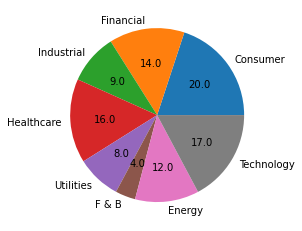

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_excel('Course 1 Final Assessment.xlsx',sheet_name='SectorX')
labels=data['Sector']
sizes=data['Big50']


def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a


plt.pie(sizes, labels=labels,autopct=absolute_value)
plt.show()

## Histogram for Return Distributions
You now want do calculate the confidence interval for large funds based on the sample of 50 that you have used so far. As the DOSM, which is the basis of sampling theory, makes certain assumptions about the population distribution you decide that you first want to visualise what the sample distribution looks like. You therefore want to produce a histogram of the sample's returns. The relevant data is on the excel spreadsheet called 'Course 1 Final Assessment', sheet name 'Big50' and column headed "Return". You decide to use matplotlib.pyplot to creat a histogram and decide that ten bins should provide enough detail. Please write the suitable code in the cell below.

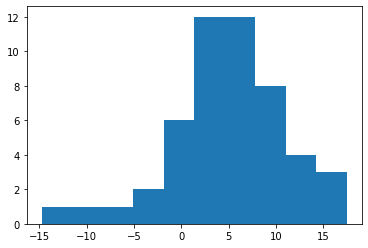

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel('Course 1 Final Assessment.xlsx',sheet_name='Big50')
plt.hist(data['Return'],)
plt.show()

## Mean and Average of Returns
As an analyst you have collected data on 215 funds which shows for each fund their AUM ($bn), most recent annualised return (%) and break down of stocks across eight market sectors - consumer, financial, industrials, healthcare, utilities, f&b, energy and technology.

The first idea you have is to wonder whether large funds have a different risk/return profile to small funds. You decide to investigate this by calculating the coefficient of variation (C/V) for the biggest 50 funds (Big50) and for the smallest 50 funds (Small50). The first step in doing this is to calculate the return and the standard deviation for Big50 and Small50.

Using the data in an excel spreadsheet called 'Course 1 Final Assessment', sheet name "Big50 and column headed 'Return', calculate, using 'statistics', the mean and standard deviation of the 50 largest funds (Big50). Please round the answers to two decimal places using the instruction print(round(x,2),round(y,2)) where x and y are the two variables (mean and standard deviation) that you are printing.

In [8]:
import pandas as pd
import numpy as np
data =pd.read_excel('Course 1 Final Assessment.xlsx',sheet_name= 'Big50')
bigmean = np.mean(data['Return'])
bigstdv = np.std(data['Return'])
print(round(bigmean,2),round(bigstdv,2))

4.92 6.23


## Bar Chart with Color

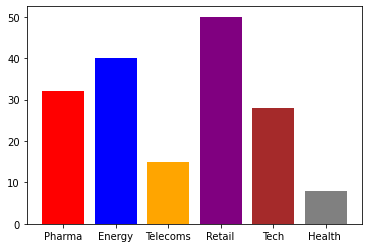

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_excel("Course 1 Module 4.xlsx",sheet_name="Bar Chart")
sector=data['Sector']
frequency=data['Freq']
plt.bar(sector,frequency,color=['red','blue','orange','purple','brown','grey'])
plt.show()

## Scatter Plot for P/E Analysis
As an analyst you are researching whether there is a correlation between a stocks P/E (price to earnings) multiple and the excess return the stock generates. You have collected the data for twenty stock and this is on an excel spreadsheet called 'Course 1 Module 4', and a sheet called 'Scatter Plot'. You decide to create a scatter plot of this date labelling the x axis 'P/E multiple' and the y axis 'Alpha". The data for the x axis is in a column headed 'P/E' and the data for the y axis is in a column headed 'Alpha'. Create this scatterplot using matplotlib.pyplot.

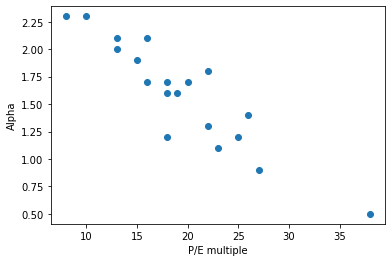

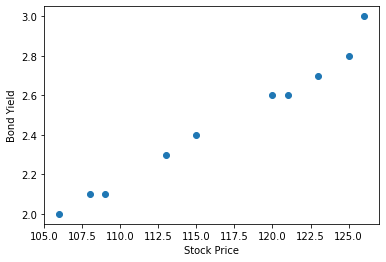

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
df_ret=pd.read_excel("Course 1 Module 4.xlsx",sheet_name="Scatter Plot")
x = df_ret['P/E']
y = df_ret ['Alpha']
plt.scatter(x,y)
plt.xlabel('P/E multiple')
plt.ylabel('Alpha')
plt.show()


# With Matplotlib

import matplotlib.pyplot as plt
x=[106,108,109,113,115,120,121,123,125,126]
y=[2.0,2.1,2.1,2.3,2.4,2.6,2.6,2.7,2.8,3.0]
plt.scatter(x,y)
plt.xlabel('Stock Price')
plt.ylabel('Bond Yield')
plt.show()

## Using Weighted Mean for Returns

Using 'numpy' calculate the weighted mean return using the data in the table shown below. Study the example in the lesson and adapt it to this data. 

The key line of code to calculate the weighted mean will be: weighted_avg_m3=round(average(distribution,weights=weight),2) but first distribution and weight will have to be defined e.g.distribution(return)=(X1,X2,X3), weight(weighting)=(X1,X2,X3).


|weighting|return|
|:---:|:---:|
|25%|1.2%|
|45%|6.7%|
|30%|3.4%|

In [11]:
from numpy import average
distribution=(1.2,6.7,3.4)
weight=(0.25,0.45,0.3)
weighted_avg_m3=round(average(distribution,weights=weight),2)
print(weighted_avg_m3)

4.34
